In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 13.2 MB/s eta 0:00:00a 0:00:01


In [6]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 20.2MB/s]


Enter the path to the image:  /kaggle/input/car-image-2/image2.jpg



image 1/1 /kaggle/input/car-image-2/image2.jpg: 608x640 6 cars, 154.3ms
Speed: 4.0ms preprocess, 154.3ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


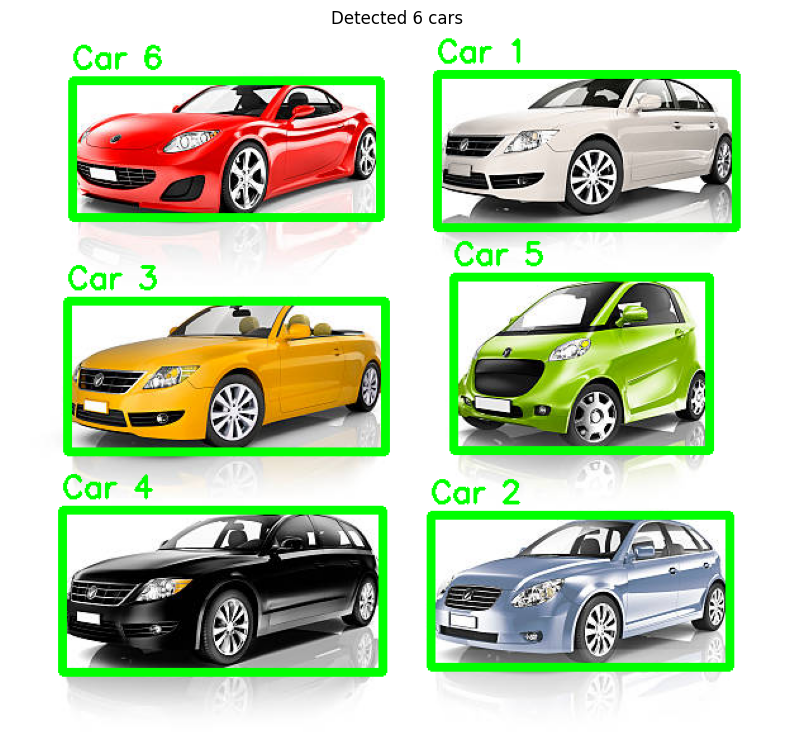

In [18]:
def process_image(image_path):
    
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

   
    results = model(image_path) 
    result = results[0]  

    
    car_count = 0  # Counter for cars
    for box in result.boxes:
        # Extract class ID and confidence score
        class_id = int(box.cls[0])  
        confidence = box.conf[0]   
        
       
        if class_id == 2: 
            car_count += 1
            x1, y1, x2, y2 = map(int, box.xyxy[0]) 
            
            # Draw bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 5)  # Green box
            
            # Assign a number to each car and draw it on the image
            label = f"Car {car_count}"
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                        0.8, (0, 255, 0), 2)

    # Display the processed image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.axis('off')
    plt.title(f"Detected {car_count} cars")
    plt.show()


image_path = input("Enter the path to the image: ")


process_image(image_path)
        

In [17]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-image-2/image2.jpg
/kaggle/input/car-image-1/car1.jpg
/kaggle/input/image-1/curvv-exterior-right-front-three-quarter.jpeg.webp
